In [2]:
# Soggetto da esaminare
s = 25




folder_path = 'coord_csv'
quadri = [1,2,4,6,7,9,10,11,13,14,15,16,18,20,21,22,23,45,47]

In [3]:
soggetti = [1,2,6,7,8,9,11,12,25,26,27,28,29,30,37,38,39,44,
            48,49,52,53,54,56,57,58,59,61,72,76,77,80,81,85,
            86,88,89,91,92,100,110,111,117,118,119,121,122,
            124,125,127,131,132,133,136,138,139,140,144,147,
            156,157,158,159,162,163,164,165,166,168,169,170,
            171,174,175,181,183,184,192,193,194,196,197,198,
            199,200,202,203,204,205,206,207,209,210,211,212,
            213,215,216,217,218,220,221,222,224,225,229,230,
            231,232,237,238,241,244,245,246,256,257,260,263,
            264,270,271,274,275,277,278,279,280,284,285,286,
            287,288,290,291,292,293,294,295,296,297,310,311,
            317,322,323,324,326,327,329,330,331,332,333,334,
            336,337,338,339,341,345,346,347,348,349,350,351,
            354,356,357,358,359,360,361,365,371,376,377,387,
            388,389,391,393,394,404,409,410,412,413,433]

In [4]:
# Importo Librerie necessarie

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [5]:
def read_subject(folder_path, m, s):
    """
    Legge in un dataframe la sessione in csv di soggetto s per quadro m.

    :param folder_path: cartella madre delle sessioni
    :param m: id del quadro
    :param s: id del soggetto.
    :return: Dataframe con coordinate x, y.
    """
    path = folder_path + f"/S{s}_Q{m}.csv"
    data = pd.read_csv(path)
    return data


In [7]:
def remove_outliers_df(df):
    """
    Rimuove gli outlier dal DataFrame basandosi sull'IQR per le colonne x e y.

    :param df: DataFrame di pandas con due colonne: 'x' e 'y'.
    :return: DataFrame di pandas senza outlier.
    """
    
    # Calcolo del Q1, Q3, e dell'IQR per entrambe le colonne
    Q1_x, Q3_x = df['x'].quantile([0.25, 0.75])
    IQR_x = Q3_x - Q1_x
    
    Q1_y, Q3_y = df['y'].quantile([0.25, 0.75])
    IQR_y = Q3_y - Q1_y

    # Definizione dei limiti per identificare gli outlier
    lower_bound_x = Q1_x - 1.5 * IQR_x
    upper_bound_x = Q3_x + 1.5 * IQR_x

    lower_bound_y = Q1_y - 1.5 * IQR_y
    upper_bound_y = Q3_y + 1.5 * IQR_y

    # Selezione dei punti che non sono outlier in nessuna delle dimensioni
    df_cleaned = df[(df['x'] >= lower_bound_x) & (df['x'] <= upper_bound_x) & 
                    (df['y'] >= lower_bound_y) & (df['y'] <= upper_bound_y)]

    return df_cleaned

In [8]:
def normalize_coordinates(coordinates, size):
    """
    Normalizza e adatta le coordinate al range dell'immagine.

    :param coordinates: Lista di tuple o array NumPy di coordinate (x, y).
    :param size: Dimensione dell'immagine (si assume che l'immagine sia quadrata).
    :return: Coordinate adattate.
    """
    coordinates = np.array(coordinates)
    min_coords = coordinates.min(axis=0)
    max_coords = coordinates.max(axis=0)

    # Normalizzazione delle coordinate nel range [0, 1]
    normalized_coords = (coordinates - min_coords) / (max_coords - min_coords)

    # Adattamento delle coordinate normalizzate al range dell'immagine
    adapted_coords = normalized_coords * size

    return adapted_coords

def map_coordinates_on_image(image_path, coordinates, s, m):
    """
    Mappa un set di coordinate normalizzate su un'immagine quadrata e la visualizza.

    :param image_path: Percorso dell'immagine su cui mappare le coordinate.
    :param coordinates: Lista di tuple o array NumPy di coordinate (x, y) normalizzate e adattate.
    """
    img = mpimg.imread(image_path)
    size = min(img.shape[:2])  # Assume l'immagine quadrata e prende il lato minore
    
    adapted_coordinates = normalize_coordinates(coordinates, size)

    plt.figure(figsize=(8, 8))
    plt.imshow(img, extent=[0, size, 0, size])

    for x, y in adapted_coordinates:
        plt.plot(x, y, 'ro', alpha=0.8)

    plt.axis('off')
    plt.savefig(f"Img{m}.png")

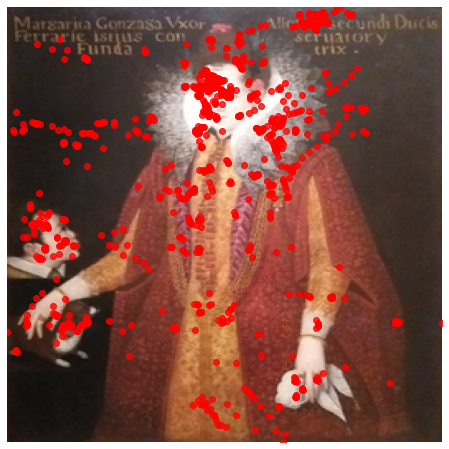

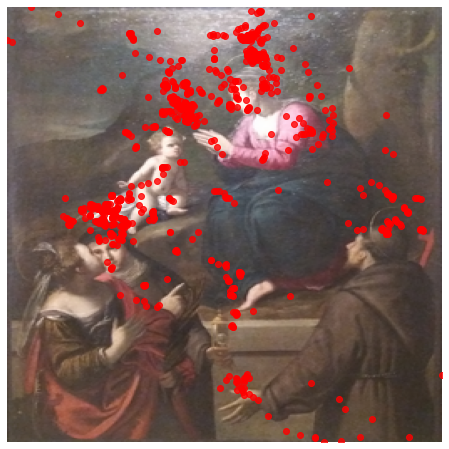

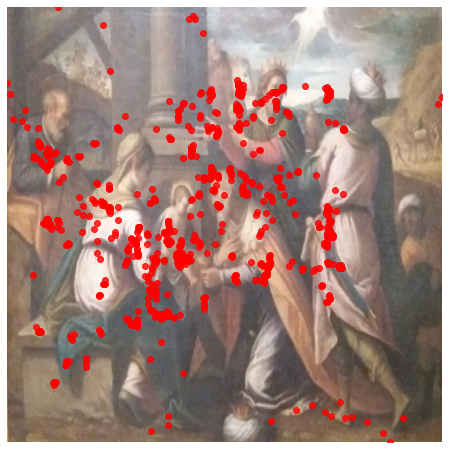

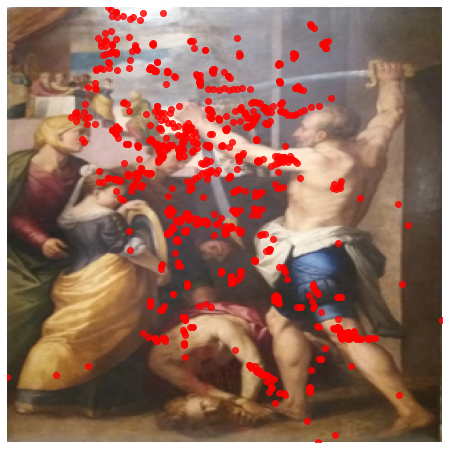

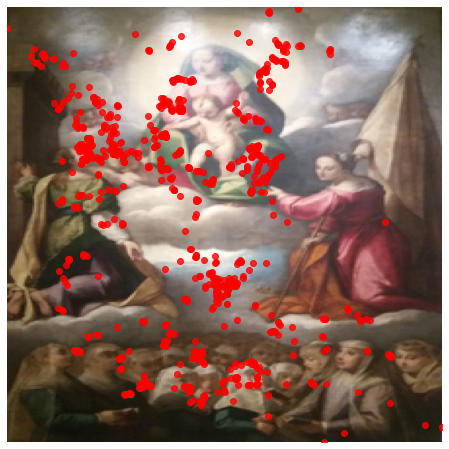

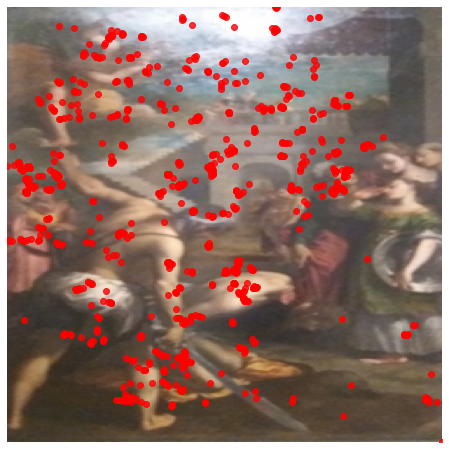

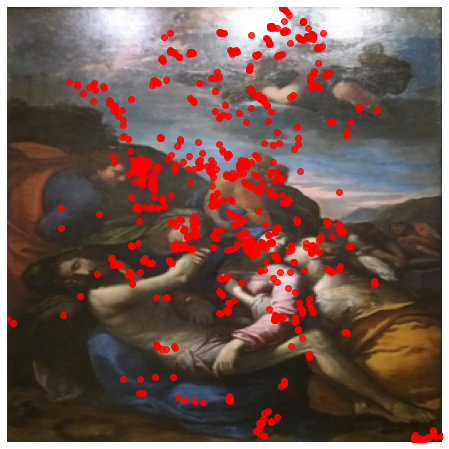

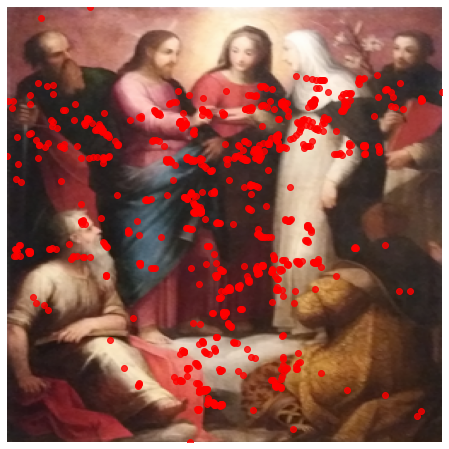

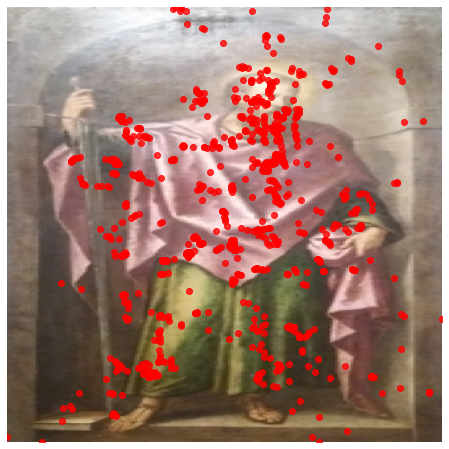

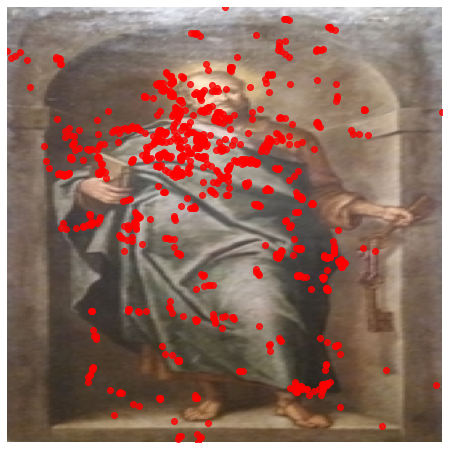

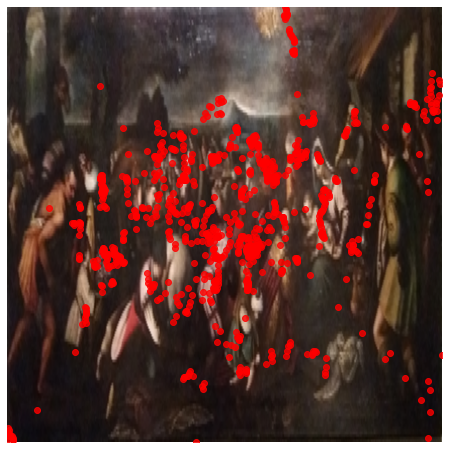

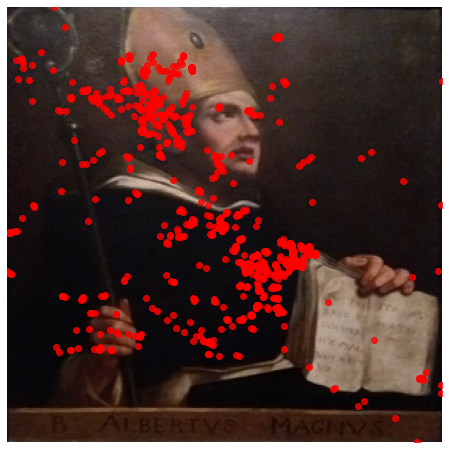

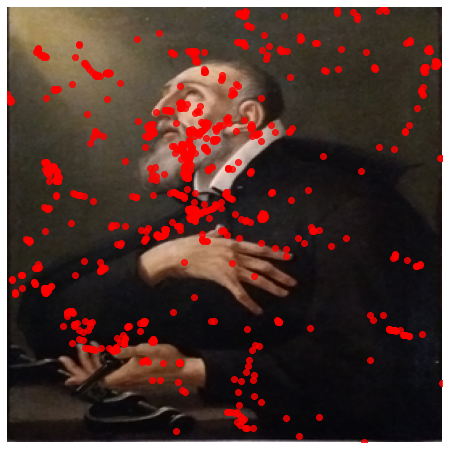

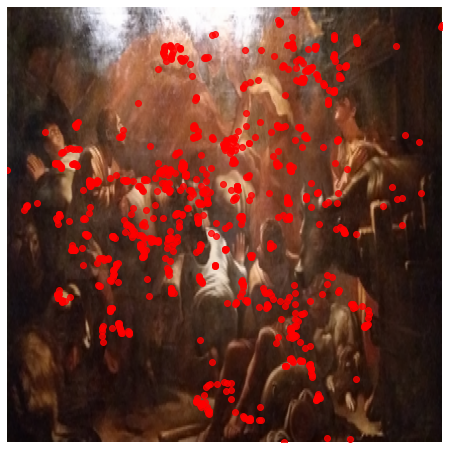

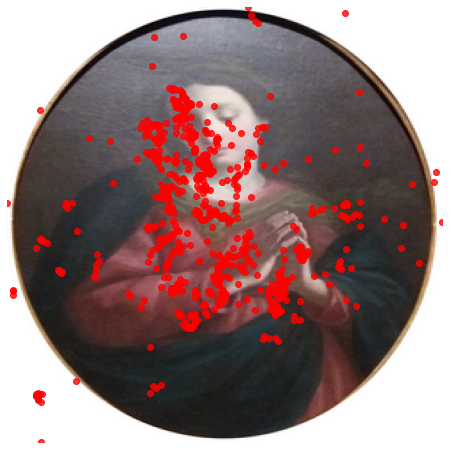

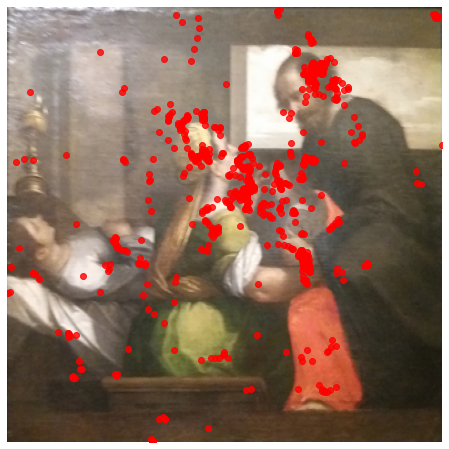

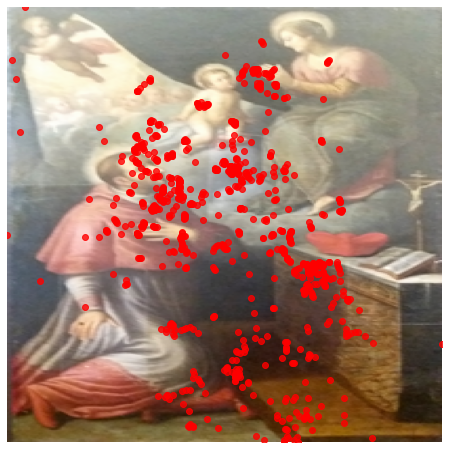

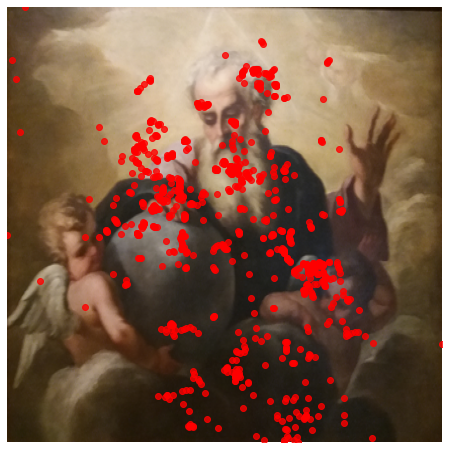

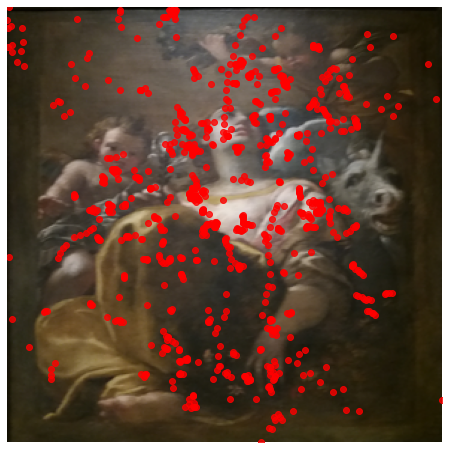

In [6]:
for m in quadri:
    try:
        img_path = f'imgs/Img{m}.bmp'
        img = Image.open(img_path)

        try:
            data = read_subject(folder_path, m, s)
            data = remove_outliers_df(data)
            coordinates = data.to_numpy()
        except:
            print()

        map_coordinates_on_image(img_path, coordinates, s, m)
    except:
        print()

In [9]:

for s in soggetti:
    for q in quadri:
        try:
            data = read_subject(folder_path, q, s)
            data = remove_outliers_df(data)
            data.to_csv(f'coords_filtered/S{s}_Q{q}.csv', index=False)
        except:
            print(str(s)+' '+str(q))

6 45
7 45
8 45
9 45
11 45
12 45
25 45
26 45
27 45
28 45
29 45
30 45
37 45
38 45
39 45
44 45
48 45
49 45
52 45
53 45
54 45
56 45
57 45
58 45
59 45
61 45
72 45
76 45
77 45
80 45
81 45
85 45
86 45
88 45
89 45
91 45
92 45
110 45
111 45
117 45
118 45
119 45
121 45
122 45
124 45
125 45
127 45
131 45
132 45
133 45
136 45
138 45
139 45
140 45
144 45
147 45
156 45
157 45
158 45
159 45
162 45
163 45
164 45
165 45
166 45
168 45
169 45
170 45
171 45
174 45
175 45
181 45
183 45
184 45
192 45
193 45
194 45
196 45
197 45
198 45
199 45
200 45
202 45
203 45
204 45
205 45
206 45
207 45
209 45
210 45
211 45
212 45
213 45
215 45
216 45
217 45
218 45
220 45
221 45
222 45
224 45
225 45
229 45
230 45
231 45
232 45
237 45
238 45
241 45
244 45
245 45
246 45
256 45
257 45
260 45
263 45
264 45
270 45
271 45
274 45
275 45
277 45
278 45
279 45
280 45
284 45
285 45
286 45
287 45
288 45
290 45
291 45
292 45
293 45
294 45
295 45
296 45
297 45
310 45
311 45
317 45
322 45
323 45
324 45
326 45
327 45
329 45
330 45
331 4